<a href="https://colab.research.google.com/github/choheeee22/ds_Section1_Project/blob/main/Section1_Project_GameIndustry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import files
uploaded=files.upload()

import io 

Saving vgames2.csv to vgames2 (1).csv


In [2]:
dfraw=pd.read_csv("vgames2.csv",thousands=',')
dfraw.drop(dfraw.columns[dfraw.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
dfraw


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [3]:
dfraw.dtypes

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object

수량 단위는 million으로 추정 (1,000,000)
추정 근거 자료 
https://en.wikipedia.org/wiki/List_of_best-selling_video_games

In [4]:
#sales features 뽑아내기 - df_sales
df_sales=dfraw.loc[:,'NA_Sales':'Other_Sales']
df_sales

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,0.04,0,0,0
1,0.17,0,0,0.01
2,0,0,0.02,0
3,0.04,0,0,0
4,0.12,0.09,0,0.04
...,...,...,...,...
16593,0.15,0.04,0,0.01
16594,0.01,0,0,0
16595,0.44,0.19,0.03,0.13
16596,0.05,0.05,0.25,0.03


In [5]:
#실패 K 바꾸는 함수 (# K->  숫자 *1/1000, M-> 지우기 ) =>실패
#def Kto_numeric(i):
#  for index,value in df_sales.iteritems():
#    #if index==columnname:
#    if value.str.contains("K").any():
#      value=value.str.replace('K','')
#      try:
#        value=pd.to_numeric(value)
      #except:
      #continue
#        return value=value*(1/1000)

In [6]:
#실패 K 바꾸는 함수 (# K->  숫자 *1/1000, M-> 지우기 ) => 실패
#def Mto_numeric(i):
#  for index,value in df_sales.iteritems():
    #if index==columnname:
#    if value.str.contains("M").any():
#      value=value.str.replace('M','')
#      try:
#        value=pd.to_numeric(value)
#      except:
#        continue
#    value=value

In [7]:
def converting(x) :
  if "K" in str(x):
    return pd.to_numeric(str(x).replace("K",""))*(1/1000)
  elif "M" in str(x):
    return pd.to_numeric(str(x).replace("M",""))
  else:
    return float(x)


In [8]:
df_sales['NA_Sales']=df_sales['NA_Sales'].apply(converting)

In [9]:
df_sales['EU_Sales']=df_sales['EU_Sales'].apply(converting)

In [10]:
df_sales['JP_Sales']=df_sales['JP_Sales'].apply(converting)

In [11]:
df_sales['Other_Sales']=df_sales['Other_Sales'].apply(converting)

In [12]:
#Sales Data 수정 후 concat -df
df=pd.concat([dfraw.iloc[:,:5],df_sales],axis=1)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [13]:
#Total sales 열 추가 
df['Total_Sales']=df.iloc[:,5:].sum(axis=1)
df['Total_Sales']

0        0.04
1        0.18
2        0.02
3        0.04
4        0.25
         ... 
16593    0.20
16594    0.01
16595    0.79
16596    0.38
16597    0.17
Name: Total_Sales, Length: 16598, dtype: float64

In [14]:
#중복데이터 확인
df[['Name']].duplicated().sum()

5105

In [15]:
#검사 - 진짜 exact match네... 하지만 platform 이 다른건 다른걸로 치겠어 
df.loc[df['Name']=='NBA 2K12']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
270,NBA 2K12,PSP,2011.0,Sports,Take-Two Interactive,0.22,0.03,0.00,0.03,0.28
343,NBA 2K12,X360,2011.0,Sports,Take-Two Interactive,2.31,0.14,0.01,0.16,2.62
6929,NBA 2K12,PS3,2011.0,Sports,Take-Two Interactive,1.61,0.27,0.05,0.18,2.11
9112,NBA 2K12,PC,2011.0,Sports,Take-Two Interactive,0.09,0.05,0.00,0.02,0.16
15533,NBA 2K12,Wii,2011.0,Sports,Take-Two Interactive,0.30,0.03,0.00,0.02,0.35


In [16]:
df[['Name','Platform']].duplicated().sum(),

(5,)

In [17]:
df[['Name','Platform','Year']].duplicated().sum()

2

In [18]:
df_Duplicate=df[df[['Name','Platform','Year','Genre']].duplicated()]
df_Duplicate

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
8717,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,0.0,0.01,0.00,0.0,0.01
9184,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0.0,0.00,0.02,0.0,0.02


In [19]:
#검사 - 진짜 exact match네... 하지만 platform 이 다른건 서로 다른 게임으로 치겠어 (행 8717만 버리기, mean이 1.09 이므로 )
df.loc[df['Name']=='Madden NFL 13']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
4838,Madden NFL 13,X360,2012.0,Sports,Electronic Arts,2.53,0.16,0.0,0.17,2.86
5288,Madden NFL 13,WiiU,2012.0,Sports,Electronic Arts,0.22,0.00,0.0,0.02,0.24
7346,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,2.11,0.23,0.0,0.22,2.56
8717,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,0.00,0.01,0.0,0.00,0.01
9504,Madden NFL 13,PSV,2012.0,Sports,Electronic Arts,0.30,0.00,0.0,0.03,0.33
11995,Madden NFL 13,Wii,2012.0,Sports,Electronic Arts,0.51,0.00,0.0,0.03,0.54


In [20]:
df['Total_Sales'].loc[df['Name']=='Madden NFL 13'].mean()

1.09

In [21]:
# 완전 일치 -> 한 값 버리기 (9184행 )
df.loc[df['Name']=='Wii de Asobu: Metroid Prime'] 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
8055,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0.0,0.0,0.02,0.0,0.02
9184,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0.0,0.0,0.02,0.0,0.02


In [22]:
#df에서 중복값 버리기 -> df2
df2=df.drop([df.index[8717],df.index[9184]])
df2

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [23]:
#확인 -> good!
df2.loc[df['Name']=='Wii de Asobu: Metroid Prime'] 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
8055,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0.0,0.0,0.02,0.0,0.02


In [24]:
#결측치 확인 
pd.DataFrame(df2.isnull().sum(),columns=["결측치 개수"])

,결측치 개수
Name,0
Platform,0
Year,270
Genre,50
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0
Total_Sales,0


In [25]:
#결측치 정보 확인 - null_data
null_data=df2[df2.isnull().any(axis=1)]
null_data

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
31,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0.00,0.21,2.48
50,Ape Escape: On the Loose,PSP,2005.0,NaN,Sony Computer Entertainment,0.52,0.01,0.12,0.05,0.70
109,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0.00,0.00,0.02,0.00,0.02
272,UK Truck Simulator,PC,2010.0,Simulation,NaN,0.00,0.03,0.00,0.00,0.03
273,Jewel Link Chronicles: Mountains of Madness,DS,NaN,Puzzle,Avanquest,0.00,0.06,0.00,0.01,0.07
...,...,...,...,...,...,...,...,...,...,...
16425,Yoostar on MTV,X360,NaN,Misc,Unknown,0.06,0.00,0.00,0.00,0.06
16431,Cars: Mater-National Championship,X360,2007.0,NaN,THQ,0.13,0.00,0.00,0.01,0.14
16432,Bejeweled 3,X360,NaN,Puzzle,Unknown,0.13,0.00,0.00,0.01,0.14
16555,Apache: Air Assault,PC,2010.0,NaN,Just Flight,0.00,0.03,0.00,0.01,0.04


In [26]:
null_data['Total_Sales'].sum()

160.45999999999998

In [27]:
#결측치 total이 전체 데이터에서 차지하는 비율 (sales & 개수 - 2% 정도임)
null_data['Total_Sales'].sum()/df2['Total_Sales'].sum(),357/16595 #sales unit, 개수

(0.017997222913876676, 0.021512503766194638)

In [28]:
#결측치중 꼭 살려야 하는 데이터 파악 (전체데이터 sales unit 75% 기준)-null_data_important (80/357) -22% 살리기 --> 최종 277 버리기 ->new data 16320 개 
null_data_important=null_data[null_data['Total_Sales']>0.47]
null_data_important

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
31,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0.00,0.21,2.48
50,Ape Escape: On the Loose,PSP,2005.0,NaN,Sony Computer Entertainment,0.52,0.01,0.12,0.05,0.70
408,NBA Ballers,XB,2004.0,NaN,Midway Games,0.37,0.11,0.00,0.02,0.50
1041,Metal Gear Solid 2: Substance,XB,NaN,Action,Konami Digital Entertainment,0.38,0.22,0.00,0.03,0.63
1328,NFL Street,XB,2004.0,NaN,Electronic Arts,0.49,0.15,0.00,0.02,0.66
...,...,...,...,...,...,...,...,...,...,...
15426,"WarioWare, Inc.: Mega Party Game$",GC,2003.0,NaN,Nintendo,0.20,0.05,0.44,0.02,0.71
15526,Bloodborne,PS4,2015.0,NaN,Sony Computer Entertainment,1.00,0.76,0.26,0.36,2.38
16275,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
16278,Madden NFL 11,Wii,NaN,Sports,Unknown,0.70,0.00,0.00,0.05,0.75


In [29]:
#null_data_important column별 결측치 확인 - 얘를 어떻게 할 지는 생각해보자 
pd.DataFrame(null_data_important.isna().sum(),columns=["결측치 개수"])

,결측치 개수
Name,0
Platform,0
Year,54
Genre,21
Publisher,8
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0
Total_Sales,0


In [30]:
!pip install pandas-profiling==2.7.1 
import pandas_profiling


In [31]:
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [32]:
#platform/year/genre별 total_sales 보기 -결측치 missing value처리위해 
Total_Sales_by_Genre=pd.DataFrame(df2.groupby(['Genre'])['Total_Sales'].sum().describe())
Total_Sales_by_Platform=pd.DataFrame(df2.groupby(['Platform'])['Total_Sales'].sum().describe())
Total_Sales_by_Year=pd.DataFrame(df2.groupby(['Year'])['Total_Sales'].sum().describe())


In [33]:
Total_Sales_by_Genre_raw=df2[['Genre','Total_Sales']]


In [34]:
all=pd.DataFrame(df2['Total_Sales'].describe())
all

,Total_Sales
count,16596.000000
mean,0.537227
std,1.555234
min,0.000000
25%,0.060000
50%,0.170000
75%,0.472500
max,82.740000


In [35]:
#Total slaes에 대한 statistics 비교 (all, groupby) - Comparing_data
Comparing_data=pd.concat([all,Total_Sales_by_Genre,Total_Sales_by_Platform,Total_Sales_by_Year],axis=1)
columns=['all','Total_Sales_by_Genre','Total_Sales_by_Platform','Total_Sales_by_Year']
Comparing_data.columns=columns
Comparing_data

,all,Total_Sales_by_Genre,Total_Sales_by_Platform,Total_Sales_by_Year
count,16596.000000,12.000000,31.000000,62.000000
mean,0.537227,738.639167,287.607097,142.191129
std,1.555234,476.524407,351.869753,198.235802
min,0.000000,174.840000,0.030000,0.020000
25%,0.060000,354.485000,22.150000,1.592500
50%,0.170000,763.755000,200.040000,35.855000
75%,0.472500,937.742500,287.190000,253.872500
max,82.740000,1741.320000,1255.770000,676.320000


In [36]:
Total_Sales_by_Genre_raw

,Genre,Total_Sales
0,Action,0.04
1,Action,0.18
2,Adventure,0.02
3,Misc,0.04
4,Platform,0.25
...,...,...
16593,Platform,0.20
16594,Action,0.01
16595,Sports,0.79
16596,Action,0.38


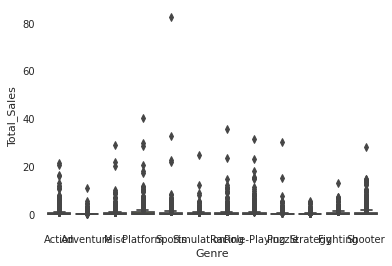

In [37]:
#이상치 검정 (시각화)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.boxplot(x="Genre",y="Total_Sales",data=Total_Sales_by_Genre_raw)
plt.show()

In [38]:
#장르 전체로 봤을 때 median과 mean은 비슷하지만 한 장르내에 편차는 크구나 -> 장르별로 따봉이 하나씩 있다
Total_Sales_by_Genre_raw.groupby(by=['Genre']).describe().transpose

<bound method DataFrame.transpose of              Total_Sales                                                      
                   count      mean       std   min   25%    50%     75%    max
Genre                                                                         
Action            3305.0  0.526874  1.157157  0.01  0.07  0.190  0.5000  21.39
Adventure         1280.0  0.186305  0.514498  0.01  0.02  0.060  0.1600  11.18
Fighting           847.0  0.529398  0.956432  0.01  0.08  0.210  0.5500  13.04
Misc              1734.0  0.461200  1.302625  0.01  0.06  0.160  0.4100  29.01
Platform           884.0  0.939174  2.588174  0.01  0.09  0.275  0.8025  40.24
Puzzle             578.0  0.421228  1.566870  0.01  0.04  0.110  0.3075  30.26
Racing            1243.0  0.585511  1.665938  0.00  0.07  0.190  0.5300  35.83
Role-Playing      1483.0  0.610270  1.666957  0.01  0.07  0.180  0.5200  31.38
Shooter           1307.0  0.792563  1.819471  0.01  0.08  0.230  0.7300  28.31
Simulation     

In [ ]:
Total_Sales_by_Genre_raw.boxplot(column=["Total_Sales"], by=["Genre"],vert=0)
plt.show()

In [ ]:
#큰 값 확인 (https://en.wikipedia.org/wiki/List_of_best-selling_video_games와 비교 -ok)
df2.sort_values(['Total_Sales'],ascending=False).head(20)

In [41]:
df2['Total_Sales'].loc[df2['Publisher']=='Nintendo'].sum()/df2['Total_Sales'].sum()

0.20035622074021234

In [ ]:
#작은 값 확인 -잘모르겠다 
df2.sort_values(['Total_Sales'],ascending=True).head(20)

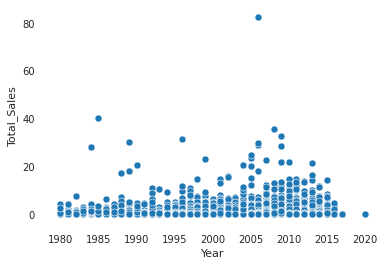

In [72]:
#날짜 이상치 확인 및 정리 -df3=df2_goodyear 
df2.sort_values(['Year'],ascending=True)
#year 확인, 정상치  (1980-2020)
df2_year_unique=df2['Year'].unique()
np.sort(df2_year_unique)
# year 정상치 ( 1980- 2020 ) - df2_goodyear 16226/16596
df2_goodyear=df2.loc[(df2['Year']>=1980)&(df2['Year']<=2020)]
df2_goodyear.dtypes
df2.Total_Sales.sum()
#이상한 년도 df2_badyear 370/ 16596 (ea)-2.2%, 160/8915 - 1.7%
df2_badyear=df2[~df2.Year.isin(df2_goodyear.Year)]
df2_badyear.Total_Sales.sum()
#Scatter Plot
sns.scatterplot(data=df2_goodyear,x=df2_goodyear.Year,y=df2_goodyear.Total_Sales,)
df3=df2_goodyear

In [74]:
#PCA 로 이상치 확인 (Sales#)
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

scaler=StandardScaler()
Z=scaler.fit_transform(df3.iloc[:,5:])
pca=PCA(4)
pca.fit(Z)
df3_pca=pca.transform(Z)

In [75]:
num_components=len(pca.explained_variance_ratio_)
vals=pca.explained_variance_ratio_
ind=np.arange(num_components)
cumvals=np.cumsum(vals)

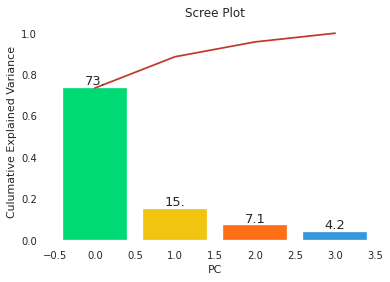

In [76]:
#PCA로 이상치 확인 (Scree plot- pc 개수 확인) -> 1개 혹은 2개 
#screeplot
import matplotlib.pyplot as plt
ax=plt.subplot()
#bar graph
ax.bar(ind,vals,color = ['#00da75', '#f1c40f',  '#ff6f15', '#3498db'])
#line graph
ax.plot(ind,cumvals,color='#c0392b')

for i in range(num_components):
  ax.annotate(r"%s"%((str(vals[i]*100)[:3])),(ind[i],vals[i]),va = "bottom", ha = "center", fontsize = 13)
plt.title('Scree Plot')
plt.xlabel('PC')
plt.ylabel('Culumative Explained Variance')

plt.show()

In [77]:
#pca_df만들기 -df_game_pca
df_game_pca=pd.DataFrame(df_pca,columns=['pc1','pc2','pc3','pc4'])
df_game_pca=pd.concat([df3[['Name','Genre','Year','Publisher','Total_Sales']],df_game_pca,],axis=1,)
df_game_pca

,Name,Genre,Year,Publisher,Total_Sales,pc1,pc2,pc3,pc4
0,Candace Kane's Candy Factory,Action,2008.0,Destineer,0.04,-0.621824,-0.053153,-0.023297,0.004489
1,The Munchables,Action,2009.0,Namco Bandai Games,0.18,-0.478494,-0.084570,-0.095774,0.099461
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,Adventure,2010.0,Alchemist,0.02,-0.630687,0.007047,0.027389,-0.016669
3,Deal or No Deal: Special Edition,Misc,2010.0,Zoo Games,0.04,-0.621824,-0.053153,-0.023297,0.004489
4,Ben 10 Ultimate Alien: Cosmic Destruction,Platform,2010.0,D3Publisher,0.25,-0.333324,-0.177682,0.037148,-0.020792
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,Platform,2006.0,Vivendi Games,0.20,NaN,NaN,NaN,NaN
16594,Rainbow Islands: Revolution,Action,2005.0,Rising Star Games,0.01,NaN,NaN,NaN,NaN
16595,NBA 2K16,Sports,2015.0,Take-Two Interactive,0.79,NaN,NaN,NaN,NaN
16596,Toukiden: The Age of Demons,Action,2013.0,Tecmo Koei,0.38,NaN,NaN,NaN,NaN


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a fu

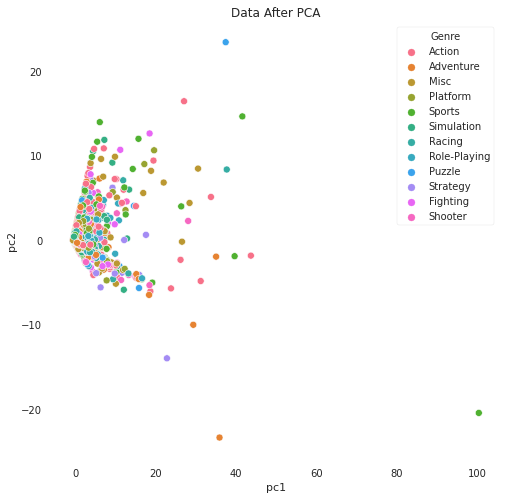

In [81]:
#시각화 (number of pc= 2) #데이터가 정규성을 띄지 않아 해석이 힘든듯..
import seaborn as sns
fig=plt.figure(figsize=(8,8))

ax1=fig.add_subplot(1,1,1)
ax2=fig.add_subplot(1,1,1)
ax3=fig.add_subplot(1,1,1)
ax4=fig.add_subplot(1,1,1)

ax1=sns.scatterplot(data=df_game_pca,x='pc1',y='pc2',hue='Genre')
#ax2=sns.scatterplot(data=df_game_pca,x='pc1',y='pc2',hue='Publisher')
#plt.subplot(142)
#ax3=sns.scatterplot(data=df_game_pca,x='pc1',y='pc2',hue='Year')
#plt.subplot(143)
#ax4=sns.scatterplot(data=df_game_pca,x='pc1',y='pc2',hue='Total_Sales')
#plt.subplot(144)
plt.title("Data After PCA")
plt.xlabel('pc1')
plt.ylabel('pc2')

plt.show()

In [90]:
df_game_pca.isna().sum()

Name           365
Genre          415
Year           365
Publisher      401
Total_Sales    365
pc1            365
pc2            365
pc3            365
pc4            365
dtype: int64

In [112]:
#clustering 용 df_game_pca사용-,nan drop후 df_game_pca2
df_game_pca
df_game_pca2=df_game_pca[["pc1","pc2","pc3"]].dropna()
df_game_pca2

,pc1,pc2,pc3
0,-0.621824,-0.053153,-0.023297
1,-0.478494,-0.084570,-0.095774
2,-0.630687,0.007047,0.027389
3,-0.621824,-0.053153,-0.023297
4,-0.333324,-0.177682,0.037148
...,...,...,...
16221,-0.445884,-0.096152,-0.087600
16222,-0.649028,-0.051088,0.001915
16223,0.353831,-0.348136,0.103219
16224,-0.130381,0.580643,0.281199


In [113]:
#Elbow methods
from sklearn.cluster import KMeans
sum_of_squared_distances=[]
K=range(1,15)
for k in K:
  km=KMeans(n_clusters=k)
  km=km.fit(df_game_pca2)
  sum_of_squared_distances.append(km.inertia_)

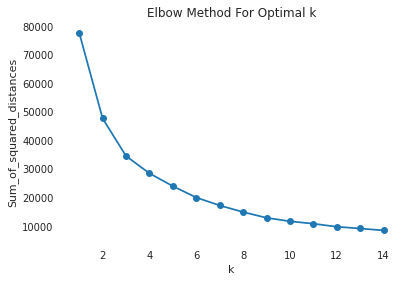

In [114]:
#Elbow method 시각화 -> 6
plt.plot(K,sum_of_squared_distances,"o-")
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [115]:
#K-means cluster 구하기 (6개)
kmeans=KMeans(n_clusters=6)
kmeans.fit(df_game_pca2)
labels=kmeans.labels_
print(labels)

cluster_center=kmeans.cluster_centers_
cluster_center

[0 0 0 ... 0 0 0]


array([[-3.63450812e-01, -3.17206255e-03, -2.61105575e-03],
       [ 2.82584644e+00,  3.78816516e+00,  8.75341323e-01],
       [ 2.87807980e+01,  4.13142483e+00, -5.76989052e-01],
       [ 1.00474069e+02, -2.04862433e+01, -6.79212102e+00],
       [ 9.68473625e+00, -1.40467759e+00,  4.59469376e-01],
       [ 1.96282425e+00, -6.32801758e-01, -1.75953078e-01]])

In [116]:
new_series=pd.Series(labels)
df_game_pca2['clusters']=new_series.values
df_game_pca2

,pc1,pc2,pc3,clusters
0,-0.621824,-0.053153,-0.023297,0
1,-0.478494,-0.084570,-0.095774,0
2,-0.630687,0.007047,0.027389,0
3,-0.621824,-0.053153,-0.023297,0
4,-0.333324,-0.177682,0.037148,0
...,...,...,...,...
16221,-0.445884,-0.096152,-0.087600,0
16222,-0.649028,-0.051088,0.001915,0
16223,0.353831,-0.348136,0.103219,0
16224,-0.130381,0.580643,0.281199,0


In [117]:
#get centroids
centroids=df_game_pca2.groupby(by=['clusters']).mean()
centroids

,pc1,pc2,pc3
clusters,,,
0,-0.363572,-0.003505,-0.002714
1,2.807550,3.777305,0.874301
2,28.780798,4.131425,-0.576989
3,100.474069,-20.486243,-6.792121
4,9.684736,-1.404678,0.459469
5,1.962824,-0.632802,-0.175953


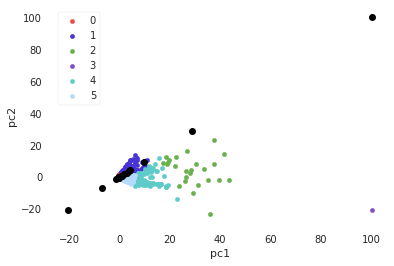

In [118]:
#K-means 시각화-완전 이상함...
colors = {0 : '#eb4d4b', 1 : '#4834d4', 2 : '#6ab04c',3:'#8250C4',4:'#5ECBC8',5:'#B5DAFE'}
fig, ax = plt.subplots()
ax.plot(centroids.iloc[0],centroids.iloc[0],'ok')
ax.plot(centroids.iloc[1],centroids.iloc[1],"ok")
ax.plot(centroids.iloc[2],centroids.iloc[2],"ok")
ax.plot(centroids.iloc[3],centroids.iloc[3],"ok")
ax.plot(centroids.iloc[4],centroids.iloc[4],"ok")
ax.plot(centroids.iloc[5],centroids.iloc[5],"ok")

grouped = df_game_pca2.groupby(by='clusters')
for key, group in grouped:
  group.plot(ax=ax,kind='scatter',x='pc1',y='pc2',label=key,color=colors[key])
plt.show()

필수 해결 과제
1.지역에 따라 선호하는 게임 장르가 다를까
2.연도별 게임의 트렌드가 있을까
3.출고량이 높은 게임에 대한 분석 및 시각화

In [122]:
#1. 지역에 따른 선호 게임 장르 --> 일본만 조금 다르다 그외는 1위 action 2위 sports, 3위 shooter
df3

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [143]:
Regional_Sales_by_Genre=pd.DataFrame(df3[['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales']])
Regional_Sales_by_Genre.groupby(by='Genre').sum().sum()

NA_Sales       4285.66
EU_Sales       2380.29
JP_Sales       1258.24
Other_Sales     778.49
dtype: float64

In [138]:
Regional_Sales_by_Genre_sum=Regional_Sales_by_Genre.groupby(by='Genre').sum()
Regional_Sales_by_Genre_sum

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,855.99,512.52,155.74,183.64
Adventure,101.46,63.37,51.81,16.64
Fighting,220.11,99.72,86.39,36.10
Misc,399.85,209.73,103.71,72.64
Platform,442.46,199.42,129.22,51.15
Puzzle,121.00,50.40,56.19,12.39
Racing,353.57,234.21,55.42,76.23
Role-Playing,307.08,176.32,336.25,54.71
Shooter,570.89,307.26,37.34,100.82


In [183]:
Total_Sales_by_Genre_raw.groupby(by='Genre').sum().sort_values(by="Total_Sales",ascending=False).head(10)

,Total_Sales
Genre,
Action,1741.32
Sports,1327.03
Shooter,1035.88
Role-Playing,905.03
Platform,830.23
Misc,799.72
Racing,727.79
Fighting,448.40
Simulation,391.49


In [171]:
#North America
NA_Genre=Regional_Sales_by_Genre_sum['NA_Sales'].sort_values(ascending=False)
NA_Genre.head(5),NA_Genre.head(5)/NA_Genre.head(5).sum()


(Genre
 Action      855.99
 Sports      664.33
 Shooter     570.89
 Platform    442.46
 Misc        399.85
 Name: NA_Sales, dtype: float64, Genre
 Action      0.291796
 Sports      0.226462
 Shooter     0.194609
 Platform    0.150829
 Misc        0.136304
 Name: NA_Sales, dtype: float64)

In [172]:
#일본
JP_Genre=Regional_Sales_by_Genre_sum['JP_Sales'].sort_values(ascending=False)
JP_Genre.head(5),JP_Genre.head(5)/JP_Genre.head(5).sum()


(Genre
 Role-Playing    336.25
 Action          155.74
 Sports          134.58
 Platform        129.22
 Misc            103.71
 Name: JP_Sales, dtype: float64, Genre
 Role-Playing    0.391216
 Action          0.181198
 Sports          0.156579
 Platform        0.150343
 Misc            0.120663
 Name: JP_Sales, dtype: float64)

In [173]:
#유럽
EU_Genre=Regional_Sales_by_Genre_sum['EU_Sales'].sort_values(ascending=False)
EU_Genre.head(5),EU_Genre.head(5)/EU_Genre.head(5).sum()

(Genre
 Action     512.52
 Sports     369.68
 Shooter    307.26
 Racing     234.21
 Misc       209.73
 Name: EU_Sales, dtype: float64, Genre
 Action     0.313775
 Sports     0.226325
 Shooter    0.188111
 Racing     0.143388
 Misc       0.128401
 Name: EU_Sales, dtype: float64)

In [174]:
#다른나라
Other_Genre=Regional_Sales_by_Genre_sum['Other_Sales'].sort_values(ascending=False)
Other_Genre.head(5),Other_Genre.head(5)/Other_Genre.head(5).sum()

(Genre
 Action     183.64
 Sports     131.73
 Shooter    100.82
 Racing      76.23
 Misc        72.64
 Name: Other_Sales, dtype: float64, Genre
 Action     0.324992
 Sports     0.233126
 Shooter    0.178424
 Racing     0.134906
 Misc       0.128553
 Name: Other_Sales, dtype: float64)

2.연도별 게임의 트렌드가 있을까 

In [192]:
df3_year_unique=df3['Year'].unique()
np.sort(df3_year_unique)

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016., 2017., 2020.])

In [194]:
#10년별로 binning
np.digitize(df3_year_unique,bins=[1980,1990,2000,2010,2020])

array([3, 3, 4, 3, 4, 3, 3, 3, 3, 4, 4, 3, 2, 4, 2, 3, 3, 1, 2, 4, 1, 2,
       2, 2, 4, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 4, 1, 5])

In [285]:
#genre로 보기로 함 -df5
df5=df3
df5['Year_Bin']=np.digitize(df3['Year'],bins=[1980,1990,2000,2005,2010,2015,2020])
df5.groupby(by='Year_Bin').sum()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Year_Bin,,,,,,
1,404720.0,235.66,31.20,101.44,7.13,375.43
2,3505921.0,574.61,282.24,369.46,47.31,1273.62
3,6365472.0,896.44,465.71,199.66,134.12,1695.93
4,11995217.0,1502.84,785.79,309.92,329.07,2927.62
5,8365979.0,972.27,706.14,243.81,229.28,2151.50
6,1916610.0,124.18,122.33,46.83,37.10,330.44
7,2020.0,0.27,0.00,0.00,0.02,0.29


In [286]:
df5.drop("Year",axis=1).groupby(by='Year_Bin').describe()

NA_Sales                            ... Total_Sales                      
            count      mean       std   min  ...         25%    50%     75%    max
Year_Bin                                     ...                                  
1           204.0  1.155196  3.367126  0.00  ...        0.39  0.845  1.5675  40.24
2          1756.0  0.327227  0.818022  0.00  ...        0.11  0.270  0.6900  31.38
3          3179.0  0.281988  0.562743  0.00  ...        0.08  0.200  0.5300  20.81
4          5976.0  0.251479  0.858256  0.00  ...        0.05  0.150  0.4300  82.74
5          4159.0  0.233775  0.646231  0.00  ...        0.05  0.160  0.4500  21.82
6           951.0  0.130578  0.391912  0.00  ...        0.03  0.070  0.2650  14.24
7             1.0  0.270000       NaN  0.27  ...        0.29  0.290  0.2900   0.29

[7 rows x 40 columns]

In [ ]:
#해석 - 1980년대에는 표준편차가 아주 큼 -> 특정 top 게임이 차지하는 비중이 매우큼, 점점 한 게임의 독점이 아닌 여러 게임이 사랑을 나눠 가짐 

In [287]:
#1980년대 top 10 게임이 전체의 44% 차지 
df5.loc[df5.Year_Bin==1].sort_values(by="Total_Sales",ascending=False).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Year_Bin
4199,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1
1203,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,1
10488,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,1
9491,Super Mario Land,GB,1989.0,Platform,Nintendo,10.83,2.71,4.18,0.42,18.14,1
14856,Super Mario Bros. 3,NES,1988.0,Platform,Nintendo,9.54,3.44,3.84,0.46,17.28,1
5820,Pac-Man,2600,1982.0,Puzzle,Atari,7.28,0.45,0.00,0.08,7.81,1
7494,Super Mario Bros. 2,NES,1988.0,Platform,Nintendo,5.39,1.18,0.70,0.19,7.46,1
10791,The Legend of Zelda,NES,1986.0,Action,Nintendo,3.74,0.93,1.69,0.14,6.50,1
11053,Tetris,NES,1988.0,Puzzle,Nintendo,2.97,0.69,1.81,0.11,5.58,1
11689,Dr. Mario,GB,1989.0,Puzzle,Nintendo,2.18,0.96,2.00,0.20,5.34,1


In [288]:
df5["Total_Sales"].loc[df5.Year_Bin==1].sort_values(ascending=False).head(10).sum()/df5["Total_Sales"].loc[df5.Year_Bin==1].sum()

0.4446101803265589

In [289]:
#연도별 platfrom, genre 확인 
Year_bin_P_table=pd.crosstab(df5['Year_Bin'],columns=df5['Platform'],margins=True,margins_name="Total")
Year_bin_P_table

Platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne,Total
Year_Bin,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,116,0,0,0,1,11,0,0,0,0,0,74,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,204
2,0,3,0,21,0,59,0,0,27,1,244,23,12,38,1,911,0,0,0,0,0,170,6,236,2,2,0,0,0,0,0,1756
3,0,0,0,29,23,26,629,398,0,0,70,0,0,104,0,271,1056,0,0,15,0,0,0,0,0,4,0,0,0,554,0,3179
4,0,0,0,2,1584,0,178,141,0,0,0,0,0,333,0,0,1014,415,0,679,0,0,0,0,0,0,835,0,551,244,0,5976
5,0,0,377,0,508,0,0,0,0,0,0,0,0,372,0,0,45,776,90,493,236,0,0,0,0,0,446,105,631,0,80,4159
6,0,0,119,0,0,0,0,0,0,0,0,0,0,88,0,0,0,104,243,3,171,0,0,0,0,0,4,38,48,0,133,951
7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Total,116,3,496,52,2117,96,807,539,27,1,314,97,12,937,1,1182,2115,1295,333,1190,407,170,6,236,2,6,1285,143,1230,798,213,16226


플랫폼이 다양화 됐다가 줄어듬 (GBA/GC도 없어짐 )
->ps , pc, wii xone, ds??

In [292]:
Year_bin_G_table=pd.crosstab(df5['Year_Bin'],columns=df5['Genre'],margins=True,margins_name="Total")
Year_bin_G_table

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Total
Year_Bin,,,,,,,,,,,,,
1,66,2,4,8,32,19,8,9,30,3,22,0,203
2,158,96,191,115,124,71,179,171,136,86,303,121,1751
3,502,128,184,228,291,78,392,232,294,123,590,126,3168
4,1071,502,256,787,268,278,399,496,418,424,807,251,5957
5,1062,451,159,502,127,107,194,431,325,183,467,140,4148
6,369,87,35,55,24,6,38,119,65,24,99,27,948
7,0,0,0,0,0,0,0,0,0,1,0,0,1
Total,3228,1266,829,1695,866,559,1210,1458,1268,844,2288,665,16176


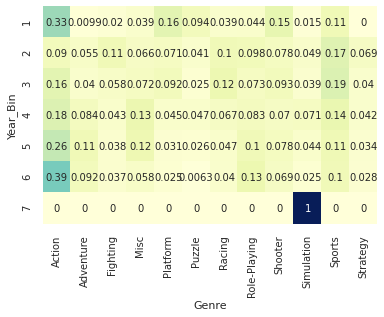

In [310]:
Year_bin_G_Ntable=pd.crosstab(df5['Year_Bin'],columns=df5['Genre'],margins=True,margins_name="Total",normalize='index')
sns.heatmap(pd.crosstab(df5['Year_Bin'],columns=df5['Genre'],normalize='index'),cmap="YlGnBu", annot=True, cbar=False)

In [309]:
Year_bin_G_Ntable

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year_Bin,,,,,,,,,,,,
1,0.325123,0.009852,0.019704,0.039409,0.157635,0.093596,0.039409,0.044335,0.147783,0.014778,0.108374,0.000000
2,0.090234,0.054826,0.109081,0.065677,0.070817,0.040548,0.102227,0.097658,0.077670,0.049115,0.173044,0.069103
3,0.158460,0.040404,0.058081,0.071970,0.091856,0.024621,0.123737,0.073232,0.092803,0.038826,0.186237,0.039773
4,0.179788,0.084271,0.042975,0.132113,0.044989,0.046668,0.066980,0.083263,0.070170,0.071177,0.135471,0.042135
5,0.256027,0.108727,0.038332,0.121022,0.030617,0.025796,0.046770,0.103905,0.078351,0.044118,0.112584,0.033751
6,0.389241,0.091772,0.036920,0.058017,0.025316,0.006329,0.040084,0.125527,0.068565,0.025316,0.104430,0.028481
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
Total,0.199555,0.078264,0.051249,0.104785,0.053536,0.034557,0.074802,0.090134,0.078388,0.052176,0.141444,0.041110


genre - 최근 publish게임은 action에 대한 선호도가 커짐

In [275]:
Year_bin_Pu_table=pd.crosstab(df5['Year_Bin'],columns=df5['Publisher'])
Year_bin_Pu_table

Publisher,10TACLE Studios,1C Company,20th Century Fox Video Games,2D Boy,3DO,49Games,505 Games,5pb,7G//AMES,989 Sports,989 Studios,AQ Interactive,ASC Games,ASCII Entertainment,ASCII Media Works,ASK,Abylight,Acclaim Entertainment,Accolade,Ackkstudios,Acquire,Activision,Activision Blizzard,Activision Value,Adeline Software,Aerosoft,Agatsuma Entertainment,Agetec,Aksys Games,Alawar Entertainment,Alchemist,Alternative Software,Altron,Alvion,American Softworks,Angel Studios,Answer Software,Aqua Plus,Aques,Arc System Works,...,Victor Interactive,Video System,Views,Vir2L Studios,Virgin Interactive,Virtual Play Games,Visco,Vivendi Games,Wanadoo,Warashi,Wargaming.net,Warner Bros. Interactive Entertainment,Warp,WayForward Technologies,Westwood Studios,White Park Bay Software,Wizard Video Games,XS Games,Xicat Interactive,Xing Entertainment,Xplosiv,Xseed Games,Yacht Club Games,Yamasa Entertainment,Yeti,Yuke's,Yumedia,Zenrin,Zoo Digital Publishing,Zoo Games,Zushi Games,bitComposer Games,dramatic create,fonfun,iWin,id Software,imageepoch Inc.,inXile Entertainment,"mixi, Inc",responDESIGN
Year_Bin,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,8,0,0,0,0,1,14,0,3,18,0,1,0,77,3,0,0,30,0,0,1,0,0,3,0,0,0,0,0,0,1,3,0,1,1,0,...,5,2,0,0,46,0,0,7,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,3,1,0,1,28,1,117,12,0,0,0,5,0,1,4,0,0,107,0,1,3,569,0,28,0,0,1,5,1,1,16,0,1,1,0,0,0,6,0,7,...,4,1,0,3,15,0,0,154,5,1,0,48,0,0,0,1,0,11,3,0,10,0,0,2,4,3,0,2,103,19,18,1,0,1,0,0,0,0,0,2
4,0,2,0,0,0,0,73,49,4,0,0,0,0,0,5,0,1,0,0,9,10,338,1,0,0,2,2,0,7,1,27,6,0,1,0,0,0,16,0,19,...,0,0,2,0,0,2,1,0,0,0,1,168,0,1,0,0,0,1,0,0,0,4,3,0,6,0,0,0,0,14,0,4,5,0,1,0,2,1,1,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [267]:
df5['Year_Bin'].loc[df5['Year_Bin']==1].groupby(by=df5['Publisher']).count().sort_values(ascending=False).head(10)

Publisher
Nintendo                        47
Atari                           42
Activision                      26
Namco Bandai Games              12
Mattel Interactive               8
Capcom                           8
Parker Bros.                     7
Konami Digital Entertainment     6
Coleco                           5
Hudson Soft                      5
Name: Year_Bin, dtype: int64

In [268]:
df5['Year_Bin'].loc[df5['Year_Bin']==2].groupby(by=df5['Publisher']).count().sort_values(ascending=False).head(10)

Publisher
Sony Computer Entertainment     155
Nintendo                        124
Konami Digital Entertainment    119
Sega                            113
Electronic Arts                 108
Acclaim Entertainment            77
Namco Bandai Games               74
Virgin Interactive               46
GT Interactive                   45
Capcom                           42
Name: Year_Bin, dtype: int64

In [270]:
df5['Year_Bin'].loc[df5['Year_Bin']==3].groupby(by=df5['Publisher']).count().sort_values(ascending=False).head(10)

Publisher
Electronic Arts                 888
Ubisoft                         587
Activision                      569
THQ                             543
Konami Digital Entertainment    497
Sony Computer Entertainment     381
Namco Bandai Games              365
Sega                            357
Nintendo                        354
Atari                           277
Name: Year_Bin, dtype: int64

In [271]:
df5['Year_Bin'].loc[df5['Year_Bin']==4].groupby(by=df5['Publisher']).count().sort_values(ascending=False).head(10)

Publisher
Namco Bandai Games                        463
Electronic Arts                           338
Activision                                338
Ubisoft                                   309
Konami Digital Entertainment              197
Nintendo                                  169
Warner Bros. Interactive Entertainment    168
Sega                                      158
Take-Two Interactive                      153
Tecmo Koei                                144
Name: Year_Bin, dtype: int64

In [272]:
df5['Year_Bin'].loc[df5['Year_Bin']==5].groupby(by=df5['Publisher']).count().sort_values(ascending=False).head(10)

Publisher
Ubisoft    1
Name: Year_Bin, dtype: int64

3.출고량이 높은 게임에 대한 분석 및 시각화

In [320]:
#출고량 높은게임
Top_Games=pd.DataFrame(df5.sort_values(by='Total_Sales',ascending=False).head(20))
Top_Games.reset_index(inplace=True,drop=True)
Top_Games

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Year_Bin
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,4
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83,4
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,4
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38,2
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,1
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,4
7,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01,4
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61,4
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,1


In [323]:
#시각화1 전체 sales에서 차지하는 비중
Top_Games['Total_Sales'].sum()/df5['Total_Sales'].sum()

0.06741878483077343

In [338]:
Top_Games_Genre=Top_Games.groupby(by='Genre')['Name'].count()
Top_Games_Genre

Genre
Action          2
Misc            3
Platform        4
Puzzle          1
Racing          2
Role-Playing    2
Shooter         1
Simulation      1
Sports          4
Name: Name, dtype: int64

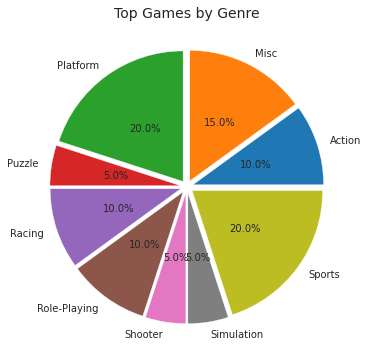

In [341]:
pie, ax = plt.subplots(figsize=[10,6])
labels = Top_Games_Genre.keys()
plt.pie(x=Top_Games_Genre, autopct="%.1f%%", explode=[0.05]*9, labels=labels, pctdistance=0.5)
plt.title("Top Games by Genre", fontsize=14);


In [342]:
Top_Games_Publisher=Top_Games.groupby(by='Publisher')['Name'].count()
Top_Games_Publisher

Publisher
Microsoft Game Studios     1
Nintendo                  17
Take-Two Interactive       2
Name: Name, dtype: int64

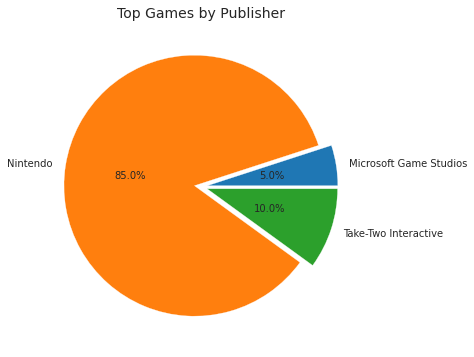

In [343]:
pie, ax = plt.subplots(figsize=[10,6])
labels = Top_Games_Publisher.keys()
plt.pie(x=Top_Games_Publisher, autopct="%.1f%%", explode=[0.05]*3, labels=labels, pctdistance=0.5)
plt.title("Top Games by Publisher", fontsize=14);

In [344]:
Top_Games_Platform=Top_Games.groupby(by='Platform')['Name'].count()
Top_Games_Platform

Platform
DS      4
GB      3
NES     2
PS2     1
PS3     1
SNES    1
Wii     7
X360    1
Name: Name, dtype: int64

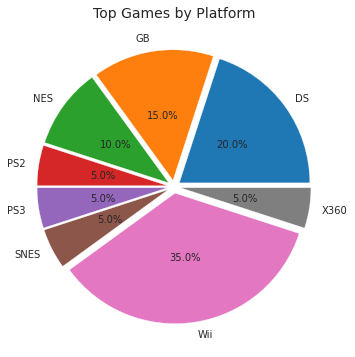

In [346]:
pie, ax = plt.subplots(figsize=[10,6])
labels = Top_Games_Platform.keys()
plt.pie(x=Top_Games_Platform, autopct="%.1f%%", explode=[0.05]*8, labels=labels, pctdistance=0.5)
plt.title("Top Games by Platform", fontsize=14);


In [348]:
Top_Games_Sales=Top_Games.iloc[:,5:10]
Top_Games_Sales

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,41.49,29.02,3.77,8.46,82.74
1,29.08,3.58,6.81,0.77,40.24
2,15.85,12.88,3.79,3.31,35.83
3,15.75,11.01,3.28,2.96,33.00
4,11.27,8.89,10.22,1.00,31.38
5,23.20,2.26,4.22,0.58,30.26
6,11.38,9.23,6.50,2.90,30.01
7,14.03,9.20,2.93,2.85,29.01
8,14.59,7.06,4.70,2.26,28.61
9,26.93,0.63,0.28,0.47,28.31


top publisher 뺐을 때 genre와 platform 보겠음